# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [1]:
import numpy as np
clock_size = 5  # i
T = 86400 * 30
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

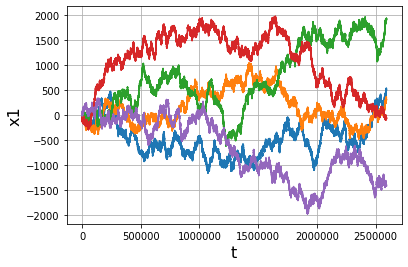

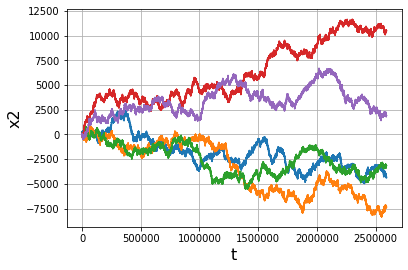

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta1 = 1
delta2 = 3
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size
# Create an empty array to store the realizations.
x1 = np.empty((m,N+1))
x2 = np.empty((m,N+1))
# Initial values of x, x0
x1[:, 0] = 0
x2[:, 0] = 0

brownian(x1[:,0], N, dt, delta1, out=x1[:,1:])
brownian(x2[:,0], N, dt, delta2, out=x2[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)

for k in range(m):
    plot(t_all, x1[k])
xlabel('t', fontsize=16)
ylabel('x1', fontsize=16)
grid(True)
show()

for k in range(m):
    plot(t_all, x2[k])
xlabel('t', fontsize=16)
ylabel('x2', fontsize=16)
grid(True)
show()

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x1[:,:-1]
w2_square_sum = x2[:,:-1]

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
print(w2_square_sum)

[[ 0.00000000e+00  1.47481471e+00  6.22699776e+00 ... -4.80986518e+09
  -4.80986956e+09 -4.80987393e+09]
 [ 0.00000000e+00 -1.23405406e+00 -5.26959734e+00 ... -8.80360524e+09
  -8.80361261e+09 -8.80361997e+09]
 [ 0.00000000e+00  3.47444800e+00  6.47004662e+00 ... -6.58705996e+09
  -6.58706314e+09 -6.58706631e+09]
 [ 0.00000000e+00 -2.88011430e+00 -8.40409569e+00 ...  1.62512009e+10
   1.62512114e+10  1.62512219e+10]
 [ 0.00000000e+00  2.66531100e+00  5.58390818e+00 ...  8.78548335e+09
   8.78548524e+09  8.78548713e+09]]


In [7]:
print(w1)

[[ 0.00000000e+00 -2.94097245e-02 -2.34608634e-01 ...  4.94390976e+02
   4.96314697e+02  4.95380728e+02]
 [ 0.00000000e+00  1.28068526e+00  7.13939172e-02 ...  3.10965994e+02
   3.09049282e+02  3.09391681e+02]
 [ 0.00000000e+00  8.75487248e-01  1.67090571e+00 ...  1.90409754e+03
   1.90498640e+03  1.90515017e+03]
 [ 0.00000000e+00 -5.56861144e-01  5.71257632e-02 ... -6.18995970e+01
  -6.26840004e+01 -6.38115426e+01]
 [ 0.00000000e+00 -7.53136212e-01 -1.43631915e+00 ... -1.41491629e+03
  -1.41435558e+03 -1.41458565e+03]]


In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

In [9]:
print(x_t.shape)
print(x_t[0][0:100])

(5, 2592000)
[ 0.00000000e+00  7.42020320e-15 -6.10688565e-16 -2.18051389e-13
 -2.37480862e-13 -2.12468467e-13 -2.84398780e-13 -4.37171972e-13
 -4.80548754e-13 -3.83449151e-13 -4.34893239e-13 -3.33802857e-13
 -3.98744546e-13 -3.86858356e-13 -2.72528553e-13 -1.90457293e-13
 -2.01438561e-13 -2.89262685e-13 -1.88910291e-13 -1.63144709e-13
 -2.11809802e-13 -1.45966678e-13  3.36062911e-14  2.07061660e-13
  2.64871050e-13  3.51527236e-13  3.62026517e-13  4.25981106e-13
  5.73413984e-13  4.92078753e-13  5.70087872e-13  4.22078796e-13
  3.60267179e-13  3.73573443e-13  3.76228759e-13  3.44737698e-13
  2.52588938e-13  3.20867354e-13  3.85824568e-13  3.77676037e-13
  5.75362111e-13  6.03984408e-13  5.96682230e-13  7.68562622e-13
  7.66138529e-13  8.38528326e-13  7.88387984e-13  7.12667395e-13
  7.81383387e-13  8.35940902e-13  7.51809395e-13  6.98071287e-13
  8.42665915e-13  7.71670028e-13  7.73787665e-13  6.95434595e-13
  5.55989931e-13  4.96796296e-13  4.75860295e-13  4.64438196e-13
  4.17221740

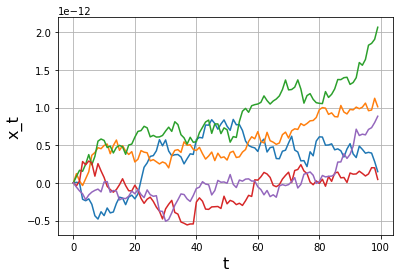

In [10]:
for k in range(x_t.shape[0]):
    plot(t[0:100], x_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [11]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

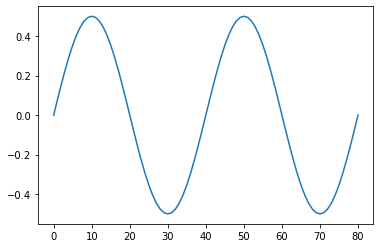

In [12]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

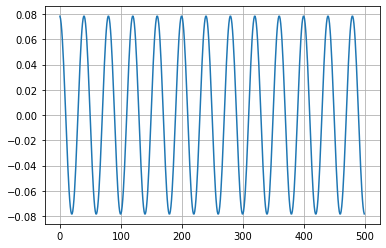

In [13]:
dx = np.diff(x_t)
dT = np.diff(delta_T)

plot(t[0:500], dT[0:500])
grid(True)
show()

Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

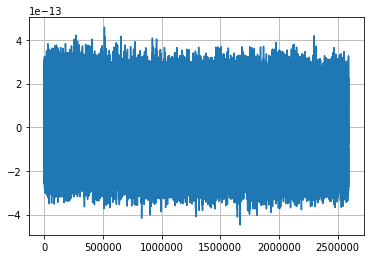

In [14]:
plot(dx[0])
grid(True)
show()

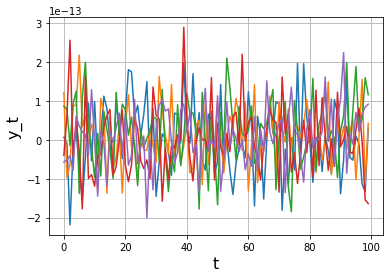

In [15]:
for k in range(Y_t.shape[0]):
    #plot(t[:-1], Y_t[k])
    plot(t[0:100], Y_t[k][0:100])
xlabel('t', fontsize=16)
ylabel('y_t', fontsize=16)
grid(True)
show()

#### 2.4 保存模拟数据

In [16]:
with open('simulated_data.npy', 'wb') as f:
    np.save(f, Y_t)
print("Simulated Data saved as 'simulated_data.npy'")

Simulated Data saved as 'simulated_data.npy'


#### 3. 计算Gamma，并绘制 figure 3

#### 3.1 每两台钟，做差并计算allan variance

In [17]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [1.24450684e-13 8.79486706e-14 6.22745267e-14 4.40891497e-14
 3.11322243e-14 2.20829864e-14 1.55818434e-14 1.10717140e-14
 7.84132276e-15 5.53077615e-15 3.89811655e-15 2.79299754e-15
 2.12991748e-15 1.77053991e-15 2.02845438e-15 2.70563695e-15
 3.69761628e-15 5.29432673e-15 7.72018749e-15 7.94496872e-15]


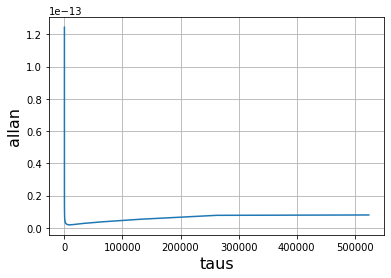

In [18]:
delta_01 = Y_t[0] - Y_t[1]
# Calculate Allan variance
(taus, adevs_01, errors, ns) = allantools.adev(data=delta_01, data_type='freq')
print('taus - %s, adevs - %s' % (taus, adevs_01))

plot(taus, adevs_01)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [2.15553161e-13 1.07789013e-13 5.39129187e-14 2.69026758e-14
 1.34101598e-14 6.72718913e-15 3.35670376e-15 1.67992014e-15
 8.41396755e-16 4.25992225e-16 2.12949227e-16 1.09269403e-16
 5.27844649e-17 2.65649469e-17 1.33212300e-17 7.25476938e-18
 4.06130342e-18 1.36004519e-18 1.23220037e-18 3.82001808e-19]


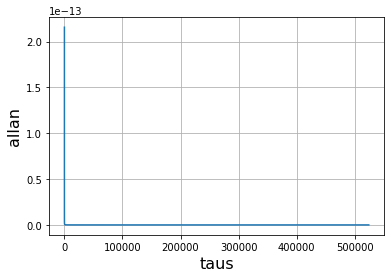

In [19]:
delta_02 = Y_t[0] - Y_t[2]
# Calculate Allan variance
(taus, adevs_02, errors, ns) = allantools.adev(data=delta_02, data_type='freq')
print('taus - %s, adevs - %s' % (taus, adevs_02))

plot(taus, adevs_02)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

#### 3.2 每三台钟，换算一台钟的allan variance，依据公式（3），（4）

In [21]:
# TODO

#### 3.3 每两台钟，换算相关性C，依据公式（5）

In [22]:
# TODO

#### 3.4 计算Gamma，并绘图

In [23]:
# TODO